In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras.models
import matplotlib.pyplot as plt
import numpy as np

In [21]:

folder = "Dataset"

train_dir = folder + '/train' 
test_dir =  folder + '/test'

input_shape = (128, 128, 3) 


batch_size = 16
epochs = 15

In [22]:



datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2

)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
)

Found 3208 images belonging to 2 classes.
Found 708 images belonging to 2 classes.


In [23]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_generator, steps_per_epoch=train_generator.n // batch_size, epochs=epochs)


test_loss, test_accuracy = model.evaluate(test_generator)

print("Loss:", test_loss)
print("Accuracy:", test_accuracy)



Epoch 1/15


c:\Users\Talee\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Talee\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


200/200 ━━━━━━━━━━━━━━━━━━━━ 24s 113ms/step - accuracy: 0.7938 - loss: 0.4568
Epoch 2/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 50us/step - accuracy: 1.0000 - loss: 0.0536  
Epoch 3/15


c:\Users\Talee\AppData\Local\Programs\Python\Python39\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


200/200 ━━━━━━━━━━━━━━━━━━━━ 23s 112ms/step - accuracy: 0.9230 - loss: 0.2157
Epoch 4/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 60us/step - accuracy: 0.9375 - loss: 0.1203  
Epoch 5/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 25s 122ms/step - accuracy: 0.9472 - loss: 0.1538
Epoch 6/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 30us/step - accuracy: 1.0000 - loss: 0.0578 
Epoch 7/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 22s 111ms/step - accuracy: 0.9459 - loss: 0.1433
Epoch 8/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 45us/step - accuracy: 0.8750 - loss: 0.1848  
Epoch 9/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 22s 108ms/step - accuracy: 0.9623 - loss: 0.1249
Epoch 10/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 25us/step - accuracy: 1.0000 - loss: 0.0497  
Epoch 11/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 22s 107ms/step - accuracy: 0.9724 - loss: 0.0749
Epoch 12/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 25us/step - accuracy: 1.0000 - loss: 0.0072  
Epoch 13/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 24s 120ms/step - accuracy: 0.9788 - loss: 0.0595
Epoch 14/15
200/200 ━━━━━━━━━

In [24]:
model.save('keras_model.h5')

In [25]:

model = keras.models.load_model('keras_model.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


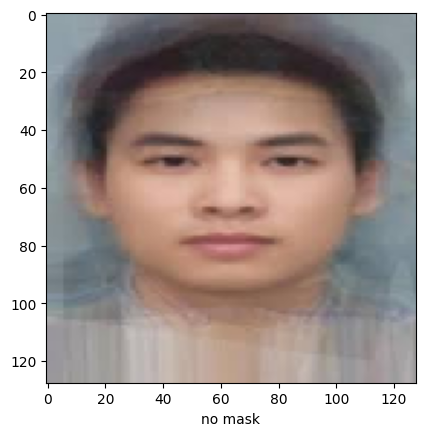

In [26]:
random_image, random_label = next(test_generator)


data_resized = tf.image.resize(random_image[0], [128, 128]) 
data_resized = tf.expand_dims(data_resized, axis=0)

predictions = model.predict(data_resized)
predicted_label = np.argmax(predictions)



prediction_name = ""

if(predicted_label==0):
    prediction_name = "with mask"
else:
    prediction_name = "no mask"
    
   

plt.imshow(random_image[0]) 
plt.xlabel(prediction_name)
plt.show()
